# **TRAINING A YOLOv8 MODEL TO DETECT BARNACLES**

By Evan Zhang

### **Initial Ideas**

At first I wanted to learn a bit more about OpenCV and try to see if I could use those tools to somehow identify barnacles.  I watched a few tutorials and read up on the notation but it seemed that OpenCV did not have the best toolset to identify barnacles (stuff like Haar Cascades didn't seem super promising)

But the concept itself seemed very possible as barnacles (especially the acorn barnacles that seem to be in the given images) have a distinct appearance.  They have a shell indicated by a usually dark circle with a slit-like apperature in the middle.  Thus I thought that perhaps applying a state of the art detection model like
YOLO (You Only Look Once) **https://github.com/ultralytics/ultralytics** could work.

I referenced this github repo to learn about how to train YOLO for my own purpose: **https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb**

Specifically, I used the YOLOv8n detection model, which takes in 640x640 pixel images and is the smallest and least powerful version.  A detection model was bets for my task as I could count the number of detections in order to tally the amount of barnacles in an image.

## **Process**

I searched a lot of databases like kaggle and roboflow for existing datasets on barnacles but none really existed or were not annoted correctly for my task.  Thus, I used **https://app.cvat.ai/tasks** to annotate my own images.  I tried to follow a consistent annotation method of labeling as much of each barnacle as possible while using a variety of different barnacle images.

YOLOv8 uses a very particular input structure for its images and labels.  The way I formatted it was as follows:

```
data/
    images/
        train/    # training images
        val/      # images for validation
    labels/
        train/    # training labels (float values for where my annotations are)
        val/      # validation labels

data.yaml  # yaml file that directs where to find the training and validation
```

**More detailed information about the runs can be found in the `runs/` folder of this repo*

### **Iteration 1**

In my first iteration, I only used ~ 20 images in my training set which was a very small sample size.  Likewise, my image choice wasn't ideal which resulted in pretty terrible training results.  The loss of the model was decreasing over time but the confidence/precision in the `results.png` graph were pretty terrible sitting at **~ 0.0150** which meant the model was very unsure about what a barnacle was.

<img src = "runs/Iteration1/results.png" alt = "Iteration1 Results" width="1000">

### **Iteration 2**

Obviously I needed a bit more data but I realized the main issue was that the images I was using to train were almost all of large clusters of barnacles.  Thus, I added a bunch of zoomed-in pictures of singular barnacles to aid the model's detection.

Also, since there aren't too many barnacle pictures on the internet, I augmented the data by also rotating it 90, 180, and 270 degrees, essentially quadrupling the amount of data to be trained on.  This ultimately resulted in ~ 80 images for this second training iteration.

The results were far far better with the model's confidence/precision reaching values of 0.6 - 0.7 (1.0 would be 100% confidence).  Looking at the `val_batch0_labels.jpg` and the `val_batch0_pred.jpg` the predicted labels in the latter were pretty good but some barnacles remained undetected so I knew I could do better.

<img src = "runs/Iteration2/results.png" alt = "Iteration2 Results" width="1000">

### **Iteration 3 (Final)**

The main difference in this iteration was just manually adding and annotating hundreds of barnacle images to the dataset.  Once again, I rotated all the images to augment the data which now totalted the dataset to **250 images**.  This can be seen in the `/data` folder in the repository.  My logic was just that more data would lead to better detection which was proven true.

The results of this final iteration honestly surpassed my expectations as the confidence reached slightly above 0.8 and the `val_batch0_pred.jpg` prediction labels were also nearly perfect.

<img src = "runs/Iteration3_Final/results.png" alt = "Iteration3 Results" width="1000">

My Annotations:

<img src = "runs/Iteration3_Final/val_batch0_labels.jpg" alt = "Iteration3 Labels" width="500">

Predicted:

<img src = "runs/Iteration3_Final/val_batch0_pred.jpg" alt = "Iteration3 Pred" width="500">


**Side note: since I do not have my own nvidia gpu, I used Google Colab's gpu to train the model but this prevented me from using larger and more powerful models.*

In [ ]:
!nvidia-smi # check gpu

### **Mount to Google Drive**

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ROOT_DIR = "/content/gdrive/MyDrive/Coding/YOLOv8" # change accordingly to your Google Drive Structure

## **Installing Dependencies**

In [ ]:
# Pip install method

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

In [ ]:
import os

from ultralytics import YOLO

from IPython.display import display, Image

# **Loading the Model and Training with 100 Epochs**


In [ ]:
# Load the YOLOv8 model
model = YOLO('yolov8n.yaml') # build

# Train the model
results = model.train(data=os.path.join(ROOT_DIR, "data.yaml"), epochs=100)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/gdrive/MyDrive/Coding/YOLOv8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 23.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.2MB/s]


AMP: checks passed ✅


train: Scanning /content/gdrive/My Drive/Coding/YOLOv8/data/labels/train... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [01:38<00:00,  2.54it/s]


train: New cache created: /content/gdrive/My Drive/Coding/YOLOv8/data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/gdrive/My Drive/Coding/YOLOv8/data/labels/val.cache... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.08G      3.606      3.555      4.247        210        640: 100%|██████████| 16/16 [00:10<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]

                   all          9        164    0.00296     0.0488    0.00162   0.000501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.08G      3.708      3.115      4.091        121        640: 100%|██████████| 16/16 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all          9        164    0.00259     0.0427    0.00142   0.000463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.76G      3.383      2.946       3.83        119        640: 100%|██████████| 16/16 [00:06<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all          9        164    0.00259     0.0427     0.0014   0.000397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.61G       3.16      2.764      3.573        354        640: 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all          9        164    0.00344     0.0244    0.00177   0.000667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.9G      2.999      2.735      3.323        227        640: 100%|██████████| 16/16 [00:04<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all          9        164    0.00286     0.0427    0.00212   0.000516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.21G      2.972      2.672       3.14        137        640: 100%|██████████| 16/16 [00:07<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all          9        164     0.0137       0.22     0.0103    0.00325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.74G      2.896      2.618      2.965        189        640: 100%|██████████| 16/16 [00:04<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all          9        164     0.0113       0.14    0.00689    0.00235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.87G      2.858      2.593      2.881        200        640: 100%|██████████| 16/16 [00:06<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all          9        164      0.025      0.061     0.0235    0.00829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.98G      2.793      2.533      2.815        150        640: 100%|██████████| 16/16 [00:05<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all          9        164      0.111      0.134     0.0574     0.0176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.61G      2.729      2.392      2.729         94        640: 100%|██████████| 16/16 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all          9        164      0.158      0.298     0.0948      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.11G      2.643      2.247      2.628        210        640: 100%|██████████| 16/16 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all          9        164      0.246      0.335       0.18     0.0601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.36G      2.568      2.139      2.552        353        640: 100%|██████████| 16/16 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all          9        164      0.334      0.232      0.174      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.91G      2.502      2.069      2.529        102        640: 100%|██████████| 16/16 [00:05<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all          9        164      0.431      0.415      0.386      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.17G      2.411      1.921      2.403         87        640: 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all          9        164      0.545       0.36      0.402      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.77G       2.35      1.837      2.348        203        640: 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          9        164      0.649      0.421      0.454      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.58G      2.303      1.746      2.261        133        640: 100%|██████████| 16/16 [00:07<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all          9        164      0.652      0.502      0.533      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.72G      2.205      1.676      2.222        284        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all          9        164      0.661      0.549      0.579      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.91G      2.172      1.607       2.13        207        640: 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all          9        164      0.664      0.543      0.598      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.55G      2.132      1.669      2.164        177        640: 100%|██████████| 16/16 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all          9        164      0.784      0.573      0.642      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.82G      2.056      1.598      2.035        283        640: 100%|██████████| 16/16 [00:04<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all          9        164      0.708      0.604      0.663      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.18G      2.054      1.519      2.064        365        640: 100%|██████████| 16/16 [00:07<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all          9        164      0.718      0.616       0.69       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.68G      2.008      1.474      2.037        136        640: 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all          9        164      0.424      0.555      0.464      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.67G      1.987      1.439      1.974        177        640: 100%|██████████| 16/16 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all          9        164      0.824      0.701      0.774      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.69G      1.963      1.403       1.93        123        640: 100%|██████████| 16/16 [00:06<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all          9        164      0.735       0.72      0.757      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.84G      1.904      1.382      1.903        207        640: 100%|██████████| 16/16 [00:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all          9        164      0.777      0.681      0.763      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.65G      1.856      1.382      1.901        203        640: 100%|██████████| 16/16 [00:07<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all          9        164      0.485      0.574      0.503      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.85G      1.822      1.334      1.846        268        640: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          9        164       0.86       0.61      0.719      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.93G      1.842      1.269      1.814        267        640: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all          9        164       0.78       0.69      0.765      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.34G      1.817      1.319      1.856        205        640: 100%|██████████| 16/16 [00:07<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all          9        164      0.816      0.695      0.797      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.98G      1.787      1.288      1.821        112        640: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]

                   all          9        164      0.798      0.634       0.73      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       3.2G      1.754      1.264      1.778        184        640: 100%|██████████| 16/16 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all          9        164      0.789      0.738      0.793      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.24G      1.704      1.219      1.769        191        640: 100%|██████████| 16/16 [00:05<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all          9        164      0.775      0.732      0.812      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.29G      1.778       1.33      1.858        427        640: 100%|██████████| 16/16 [00:04<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all          9        164      0.839      0.713      0.822      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.95G      1.728      1.254      1.776        102        640: 100%|██████████| 16/16 [00:07<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all          9        164      0.827      0.726       0.83      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.17G      1.746      1.202      1.768        176        640: 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]


                   all          9        164      0.712      0.649      0.679      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.79G      1.699      1.301      1.753        204        640: 100%|██████████| 16/16 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all          9        164      0.824      0.787      0.848      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.69G      1.671      1.203      1.711        280        640: 100%|██████████| 16/16 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all          9        164       0.81      0.695      0.771      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.03G      1.707      1.283      1.751        325        640: 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all          9        164      0.787      0.744       0.79      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.93G      1.689       1.23      1.754        136        640: 100%|██████████| 16/16 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all          9        164      0.782      0.768      0.806      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.27G      1.717      1.311      1.783        109        640: 100%|██████████| 16/16 [00:04<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all          9        164      0.749      0.713      0.794      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.8G      1.655      1.208      1.736         76        640: 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all          9        164      0.882      0.768      0.849      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.68G      1.639      1.142      1.676        359        640: 100%|██████████| 16/16 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all          9        164      0.877      0.742      0.844      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.75G      1.623      1.116      1.673        158        640: 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all          9        164      0.874      0.762      0.827      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.92G      1.609      1.094      1.692        268        640: 100%|██████████| 16/16 [00:06<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all          9        164      0.856      0.763      0.872      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.93G      1.632      1.119      1.691        211        640: 100%|██████████| 16/16 [00:04<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all          9        164      0.695      0.659      0.698      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.9G      1.618      1.148      1.677        136        640: 100%|██████████| 16/16 [00:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all          9        164       0.81      0.774      0.822      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.01G      1.603       1.13      1.653        176        640: 100%|██████████| 16/16 [00:06<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all          9        164      0.852      0.774      0.864      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.59G      1.624      1.116      1.676        169        640: 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all          9        164       0.78       0.78      0.853      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.29G      1.635      1.128      1.671        190        640: 100%|██████████| 16/16 [00:06<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all          9        164      0.863      0.766       0.87      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.9G      1.587      1.139      1.628        205        640: 100%|██████████| 16/16 [00:04<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all          9        164       0.87      0.737      0.833      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.01G      1.586      1.078      1.617        180        640: 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all          9        164      0.826       0.78      0.859      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.86G      1.568      1.062      1.623        102        640: 100%|██████████| 16/16 [00:07<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all          9        164      0.837      0.782      0.862      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.99G      1.596      1.105      1.636        166        640: 100%|██████████| 16/16 [00:04<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all          9        164      0.822      0.733      0.854      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.68G      1.571      1.041      1.605        256        640: 100%|██████████| 16/16 [00:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all          9        164       0.89      0.793      0.868      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.88G      1.543      1.025      1.556        251        640: 100%|██████████| 16/16 [00:05<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all          9        164      0.909      0.789      0.874      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.79G      1.573      1.075      1.643        126        640: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all          9        164      0.863      0.731      0.834       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       2.9G      1.551      1.053      1.638        167        640: 100%|██████████| 16/16 [00:07<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all          9        164      0.876      0.811      0.896      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.82G      1.529      1.065      1.628        172        640: 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all          9        164      0.928      0.774      0.893      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.11G      1.574      1.062      1.612        437        640: 100%|██████████| 16/16 [00:06<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all          9        164      0.868      0.787      0.873      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.03G      1.515       1.05      1.622        146        640: 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all          9        164      0.907      0.811      0.901      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.75G      1.537      1.001      1.553        139        640: 100%|██████████| 16/16 [00:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all          9        164      0.909      0.817      0.899      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.32G      1.534      1.013      1.591        116        640: 100%|██████████| 16/16 [00:07<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all          9        164      0.892      0.774      0.884      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         3G      1.544      1.005      1.578        160        640: 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all          9        164      0.885      0.793      0.895      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.89G      1.491     0.9846      1.552        160        640: 100%|██████████| 16/16 [00:06<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all          9        164        0.9      0.825       0.92      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.95G      1.488     0.9665      1.543        133        640: 100%|██████████| 16/16 [00:05<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]


                   all          9        164      0.919      0.761      0.872      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.24G      1.529       1.03      1.612        138        640: 100%|██████████| 16/16 [00:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all          9        164      0.883      0.817      0.885      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.15G      1.516      1.028      1.592        197        640: 100%|██████████| 16/16 [00:07<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all          9        164        0.9      0.799        0.9      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.75G      1.506      1.002      1.554        313        640: 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all          9        164       0.89      0.788        0.9      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       3.1G      1.479      0.968      1.523        296        640: 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all          9        164      0.844      0.872      0.907      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.72G      1.466     0.9692      1.561        139        640: 100%|██████████| 16/16 [00:04<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all          9        164      0.907      0.835      0.898      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.53G      1.461       0.91      1.499        284        640: 100%|██████████| 16/16 [00:05<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all          9        164      0.886      0.851      0.898      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.41G      1.492     0.9925      1.588        125        640: 100%|██████████| 16/16 [00:05<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all          9        164      0.901      0.768      0.863      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.44G      1.481     0.9574      1.552        169        640: 100%|██████████| 16/16 [00:04<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all          9        164      0.915      0.805       0.91      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.11G      1.484     0.9762      1.575        216        640: 100%|██████████| 16/16 [00:07<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all          9        164      0.908      0.829      0.916      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.79G      1.474     0.9775      1.561        228        640: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all          9        164      0.928      0.787      0.891       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.33G      1.478     0.9616       1.55        189        640: 100%|██████████| 16/16 [00:05<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all          9        164      0.894      0.819      0.887      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.79G      1.463     0.9398      1.527        207        640: 100%|██████████| 16/16 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all          9        164      0.956      0.811      0.899      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.71G       1.43     0.9399      1.519        160        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all          9        164      0.943      0.811        0.9      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.73G      1.461      0.929      1.535        145        640: 100%|██████████| 16/16 [00:06<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all          9        164      0.926      0.829      0.907      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.69G      1.482     0.9731       1.56         61        640: 100%|██████████| 16/16 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all          9        164      0.896      0.841      0.909       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.15G      1.464     0.9172      1.499        221        640: 100%|██████████| 16/16 [00:05<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all          9        164      0.901       0.83      0.908      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.78G      1.446     0.9235      1.503        162        640: 100%|██████████| 16/16 [00:07<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]


                   all          9        164      0.895       0.83      0.913      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.93G      1.439     0.9065      1.509        167        640: 100%|██████████| 16/16 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all          9        164      0.883      0.877      0.924      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.82G      1.466      0.929      1.522        203        640: 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all          9        164      0.918      0.818      0.899      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.84G       1.44     0.9073      1.484        194        640: 100%|██████████| 16/16 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all          9        164      0.907       0.83      0.895      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.12G      1.443     0.8929      1.492        162        640: 100%|██████████| 16/16 [00:06<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all          9        164      0.932      0.835       0.91      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.75G      1.426     0.8796      1.473        261        640: 100%|██████████| 16/16 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all          9        164       0.91      0.797      0.885      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.15G      1.433     0.8806      1.473        317        640: 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          9        164       0.92      0.836       0.91      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.67G      1.403     0.8979      1.508        221        640: 100%|██████████| 16/16 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all          9        164       0.94      0.799      0.907      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.62G       1.41     0.8684      1.489        271        640: 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all          9        164      0.928      0.841      0.912      0.495


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.78G      1.334      1.013      1.523        103        640: 100%|██████████| 16/16 [00:10<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all          9        164      0.894      0.823      0.891       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.65G      1.339     0.9163      1.493         96        640: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all          9        164      0.913      0.832      0.898      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.68G      1.319     0.8873      1.491        127        640: 100%|██████████| 16/16 [00:06<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all          9        164      0.881      0.817      0.898      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.93G      1.305     0.8621      1.466         65        640: 100%|██████████| 16/16 [00:06<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all          9        164       0.93      0.799      0.908      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.66G      1.342     0.8454       1.43         99        640: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all          9        164      0.911      0.811      0.904      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.71G      1.328     0.8613      1.463         36        640: 100%|██████████| 16/16 [00:07<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all          9        164      0.884      0.854      0.921      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.64G      1.288     0.8358      1.392         20        640: 100%|██████████| 16/16 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all          9        164      0.881      0.872      0.936      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       2.7G      1.295     0.8219      1.426        135        640: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all          9        164      0.883      0.872      0.937      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.69G      1.253      0.833      1.433        128        640: 100%|██████████| 16/16 [00:07<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all          9        164      0.886      0.872      0.928      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.87G      1.266     0.8299       1.41        189        640: 100%|██████████| 16/16 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all          9        164      0.927      0.829      0.922      0.503



100 epochs completed in 0.207 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]


                   all          9        164      0.883      0.872      0.937      0.513
Speed: 1.0ms preprocess, 2.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


In [ ]:
!scp -r /content/runs '/content/gdrive/My Drive/Coding/YOLOv8/'  # will move the data into this directory in your google drive

### **Testing The Model**

The training weights from above were saved in the "weights" folder in the "runs" of the training.  I used the "best.pt" from the previous run

Structure from output:

```
runs/
    detect/
        train/            # Directory for the current training run
            weights/
                best.pt   # Best model weights (highest mAP on validation set)
                last.pt   # Last model weights at the end of training
            results.png   # Training/validation loss and metrics curves
            events.out.tfevents
            ... (a bunch of other helpful images/info)
```

I just put the trained model and test images into the `/contents` folder in Google Colab so adjust the path name based on where the model you want to load is

In [5]:
!unzip Barnacles_Images.zip

Archive:  Barnacles_Images.zip
   creating: Barnacles_Images/
  inflating: __MACOSX/._Barnacles_Images  
  inflating: Barnacles_Images/unseen_img2.png  
  inflating: __MACOSX/Barnacles_Images/._unseen_img2.png  
  inflating: Barnacles_Images/unseen_img1.png  
  inflating: __MACOSX/Barnacles_Images/._unseen_img1.png  
  inflating: Barnacles_Images/masked_img2.png  
  inflating: __MACOSX/Barnacles_Images/._masked_img2.png  
  inflating: Barnacles_Images/masked_img1.png  
  inflating: __MACOSX/Barnacles_Images/._masked_img1.png  
  inflating: Barnacles_Images/mask1.png  
  inflating: __MACOSX/Barnacles_Images/._mask1.png  
  inflating: Barnacles_Images/img2.png  
  inflating: __MACOSX/Barnacles_Images/._img2.png  
  inflating: Barnacles_Images/mask2.png  
  inflating: __MACOSX/Barnacles_Images/._mask2.png  
  inflating: Barnacles_Images/img1.png  
  inflating: __MACOSX/Barnacles_Images/._img1.png  


In [25]:
# first unseen image needs to be cropped to proportions so I used OpenCV

import cv2 as cv

img = cv.imread("/content/Barnacles_Images/unseen_img1.png")

cropped = img[190:1770, 1000:2575] # height then width, cropping
cropped2 = img[190:830, 1000:1640] # 640 x 640 smaller version


0: 640x640 207 barnacles, 227.4ms
Speed: 10.3ms preprocess, 227.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 195 barnacles, 232.5ms
Speed: 4.9ms preprocess, 232.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Barnacles_Images/unseen_img2.png: 640x640 135 barnacles, 244.0ms
Speed: 3.4ms preprocess, 244.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Image 1 - Number of Barnacles Detected: 207


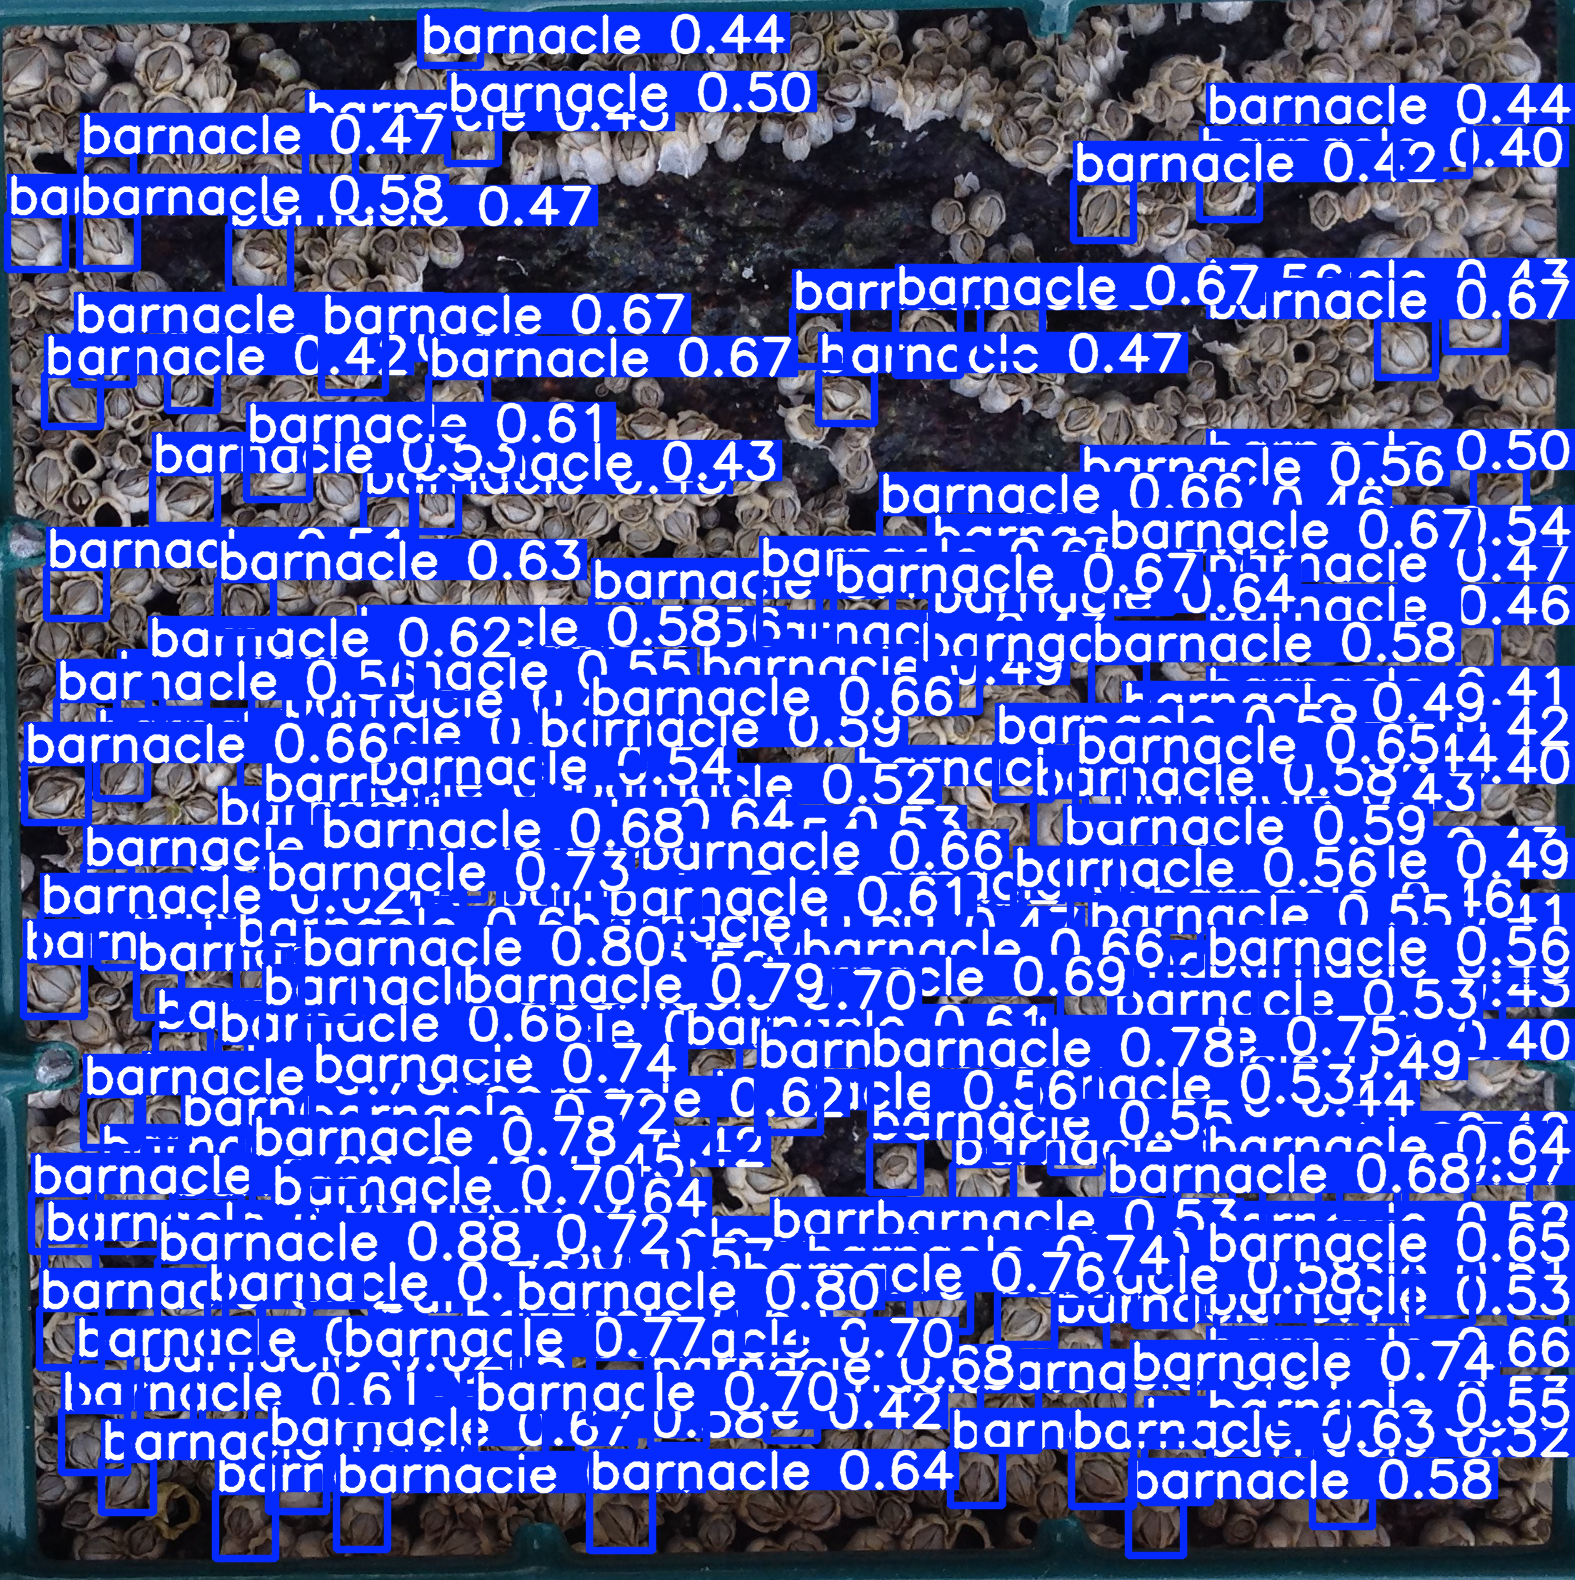

Image 2 - Number of Barnacles Detected: 135


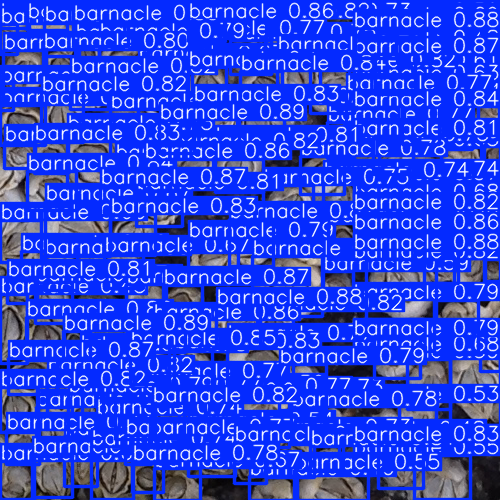

True

In [26]:
barnacle_model = YOLO('/content/best.pt') # change path name based on where it is loaded

unseen_image2 = "/content/Barnacles_Images/unseen_img2.png"
img2 = cv.imread(unseen_image2)

# run tests
results1 = barnacle_model.predict(cropped, conf=0.4)
results2 = barnacle_model.predict(cropped2, conf=0.4)
results3 = barnacle_model.predict(unseen_image2, conf=0.4)

# showing image results and calculating
for result in results1:
  num_barnacles = len(result.boxes)
  print("Image 1 - Number of Barnacles Detected: " + str(num_barnacles))
  result.show() # showing results

for result in results2:
  for box in result.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
    cv.rectangle(cropped2, (x1, y1), (x2, y2), (0, 255, 0), 2)

for result in results3:
  num_barnacles = len(result.boxes)
  print("Image 2 - Number of Barnacles Detected: " + str(num_barnacles))
  result.show()

  # using openCV to draw boxes ontop of the image so it isn't cluttered
  for box in result.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
    cv.rectangle(img2, (x1, y1), (x2, y2), (255, 0, 0), 2)

cv.imwrite("cleaned_predictions1.png", cropped2)
cv.imwrite("cleaned_predictions2.png", img2)

# splitting into 640 x 640 pixel chunks makes it easier for the model to pick the barnacles up

### **Getting Rid of Visual Clutter**

*Green Image is a 640x640 cropped section of `unseen_img1.png`

*Blue Image is of `unseen_img2.png`

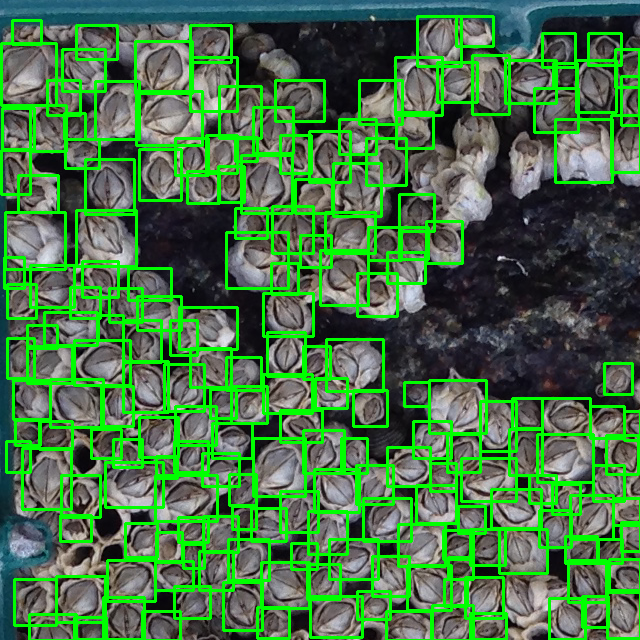

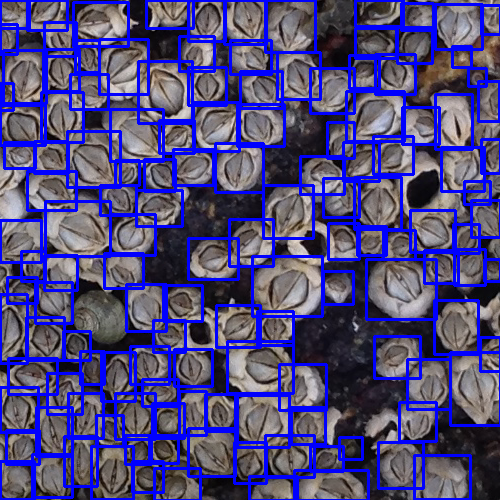

In [27]:
from IPython.display import Image, display
display(Image("cleaned_predictions1.png"))
display(Image("cleaned_predictions2.png"))

# **FINAL RESULTS and CONCLUSIONS**

This image below is how the `best.pt` model performs on the second `unseen_img2.png` that was given.  Honestly, I'm super satistfied with the results, with the model detecting **135** barnacles.  I chose a confidence value of **0.4** because that seemed to give the most accurate results.  One obvious shortcoming with the model is that it didn't detect barnacles as effectively in the first `unseen_img1.png`.  But there is a clear explanation for this is I believe the image is simply to large and the individual barnacles being too small for the model to confidently detect differences.

A simple solutions (as demonstrated in the Green image above) is to crop the image into smaller parts so that each individual barnacle is respectively larger.


## **Conclduding Notes**

### Positives:

*   I was initally concerned that the model wouldn't be able to differentiate between dead/alive barnacles (dead ones being the empty shells/rostrum) but the model seems to have done an amazing job at not labeling them
*   Likewise, similar looking things like the snail conch were not detected as a barnacle
*   Barnacles are never really counted twice

### Negatives:

*   The model seems to struggle to detect barnacles that are slanted at an angle
*   While the model seems to detect upwards of 95% of the barnacles, 1-5 seem to inevitably slip by detection
*   While rare, there are a few false positives such as in the top right of the second blue image (confidence level could be adjusted)
*   Heavily obscured barnacles are sometimes not detected (which was as expected)


## **Possible Improvements/Future Steps**

Of course, there are ways to improve the model that I've worked on (I currently don't have Google Colab Pro and I used up all of my GPU access).  Here are some ideas:

*   Perhaps even more images/data could help, especially of barnacles that appear at more of a slanted angle or are somwhat abstructed
*   Make sure annotations are more consistent.  I tried my best to do so but I was often conflicted on whether I should annotate the entire barnacles (with the shell) or just the main opening (I don't know what it is scientifically called) as I didn't want to also overlap with other barnacles that might confuse the model
*   With more computing power, larger versions of YOLO could be used that could potentially improve the results
*   YOLOv11 seems to have recently came out and implementing that might likewise improve results
*   Maybe tailor the dataset to only a specific species of barnacles in accordance to the dataset

### **How This Model Could Help the Barnacle Problem**

However, science relies on near perfect accuracy and despite this model's very high competence, it is hard to say whether it can be trusted in scientific studies.  Still though, I think the model has a lot of uses.  Mainly, the labeling (like with the green and blue boxed images above) makes it far easier for a scientist to count.  Plus, missed barnacles and false positives now become way easier to pinpoint and thus the total number of barnacles can be adjusted accordingly.

Importantly, this model conceptually shows that SOTA Deep Learning tools have the potential to save scientists drastic amounts of time.  Hopefully, this model or improved on versions can take it a step further and be relied on in future or similar studies.
